Exploratory Data Analysis

## 1. Importing Libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lib

Additional Variable Information
Anonymous Customer ID

Call Failures: number of call failures

Complains: binary (0: No complaint, 1: complaint)

Subscription Length: total months of subscription

Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)

Seconds of Use: total seconds of calls

Frequency of use: total number of calls

Frequency of SMS: total number of text messages

Distinct Called Numbers: total number of distinct phone calls

Age Group: ordinal attribute (1: younger age, 5: older age)

Tariff Plan: binary (1: Pay as you go, 2: contractual)

Status: binary (1: active, 2: non-active)

Churn: binary (1: churn, 0: non-churn) - Class label

Customer Value: The calculated value of customer

In [5]:
df = pd.read_csv('Customer_Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


## 2. Exploring the dataframe

In [7]:
print(df.dtypes)

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


In [8]:
df.isnull().sum()


Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

There are no null values

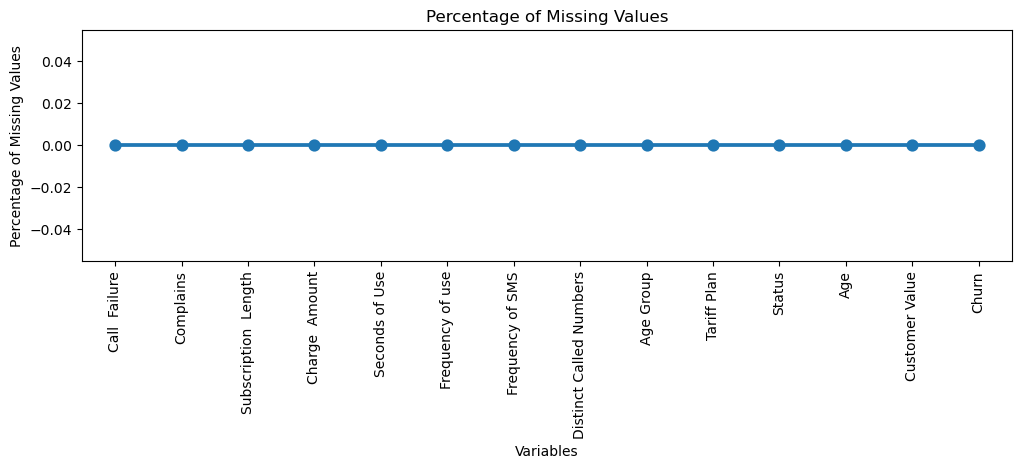

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(12,3))
ax = sns.pointplot(x='index',y= 0 ,data = missing)
plt.xticks(rotation = 90)
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values')
plt.show()

# Missing Data - Initial Intuition
Here, we don't have any missing data.

## General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

In [12]:
df.shape


(3150, 14)

There are 3150 rows and 14 variables

In [14]:
df.columns.values


array(['Call  Failure', 'Complains', 'Subscription  Length',
       'Charge  Amount', 'Seconds of Use', 'Frequency of use',
       'Frequency of SMS', 'Distinct Called Numbers', 'Age Group',
       'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'],
      dtype=object)

In [15]:
df.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [16]:
df.describe()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## 3. Exploring Target variable

The target variable is Churn

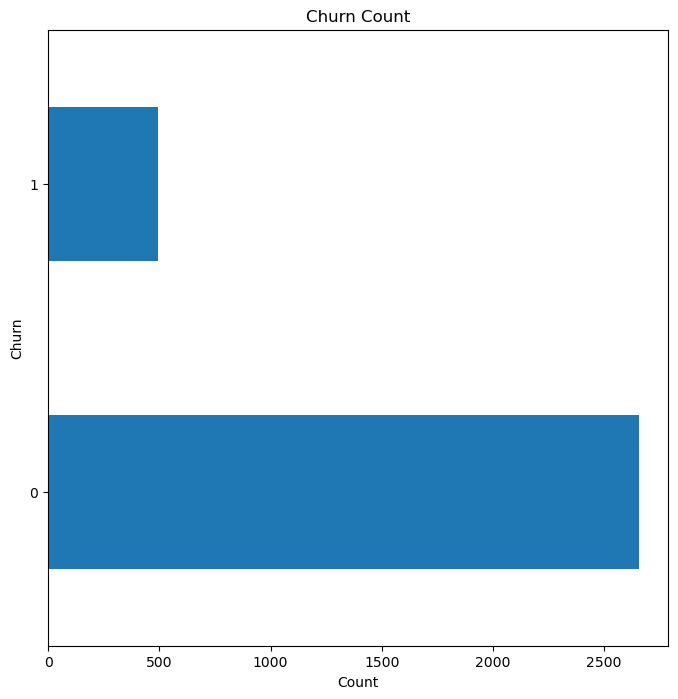

In [19]:
df['Churn'].value_counts().plot(kind = 'barh', figsize =(8,8))
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title('Churn Count')
plt.show()

In [20]:
100*df['Churn'].value_counts()/len(df['Churn'])


Churn
0    84.285714
1    15.714286
Name: count, dtype: float64

The data consists of very low proportion of churning customers to study

In [22]:
df['Churn'].value_counts()


Churn
0    2655
1     495
Name: count, dtype: int64

The churn ratio is 84:16

The data is highly imbalanced

## 4. Data Cleaning


to clean and manipulate data , let's create a copy


In [26]:
df_data= df.copy()


The data contains no null values and consistent and data types so let's proceed with binning

### Binning

1.Subscription Length  


In [30]:
# Get the max and min length
print(df_data['Subscription  Length'].max())
print(df_data['Subscription  Length'].min())


47
3


In [31]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_data['Subscription length group'] = pd.cut(df_data['Subscription  Length'], range(1, 80, 12), right=False, labels=labels)

In [32]:
 df_data['Subscription length group'].value_counts()


Subscription length group
25 - 36    1448
37 - 48    1201
13 - 24     361
1 - 12      140
49 - 60       0
61 - 72       0
Name: count, dtype: int64

2.Age

In [34]:
# Get the max and min length
print(df_data['Age'].max())
print(df_data['Age'].min())

55
15


In [35]:
# Group the Age in bins of 12 months
labels = ["{0} - {1}".format(i, i + 9) for i in range(15, 55, 10)]

df_data['Age_group'] = pd.cut(df_data['Age'], range(15, 60, 10), right=False, labels=labels)

In [36]:
df_data['Age_group'].value_counts()


Age_group
25 - 34    2462
45 - 54     395
15 - 24     123
35 - 44       0
Name: count, dtype: int64

### Remove columns not required for processing


In [38]:
df_data.drop(columns=['Age', 'Subscription  Length', 'Age Group', 'Distinct Called Numbers'], axis= 1, inplace =True)


In [39]:
df_data.head()


,Call Failure,Complains,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Tariff Plan,Status,Customer Value,Churn,Subscription length group,Age_group
0,8,0,0,4370,71,5,1,1,197.640,0,37 - 48,25 - 34
1,0,0,0,318,5,7,1,2,46.035,0,37 - 48,25 - 34
2,10,0,0,2453,60,359,1,1,1536.520,0,37 - 48,25 - 34
3,10,0,0,4198,66,1,1,1,240.020,0,37 - 48,15 - 24
4,3,0,0,2393,58,2,1,1,145.805,0,37 - 48,15 - 24


## 4. Bivariate Analysis


plot distrbution of individual predictors by churn


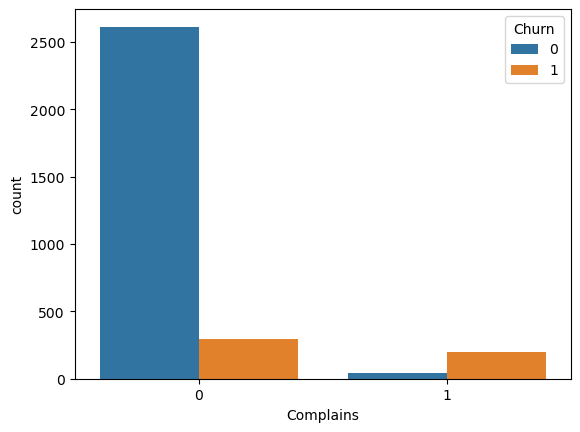

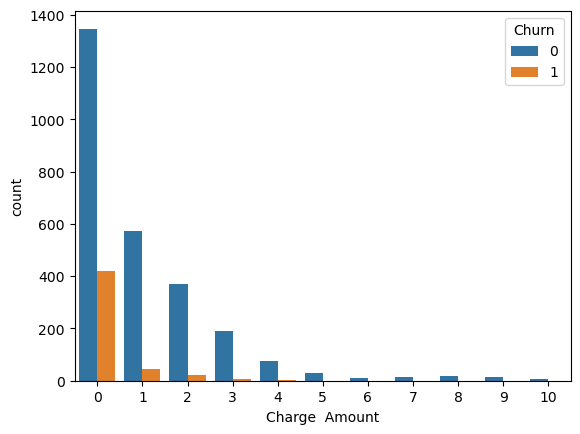

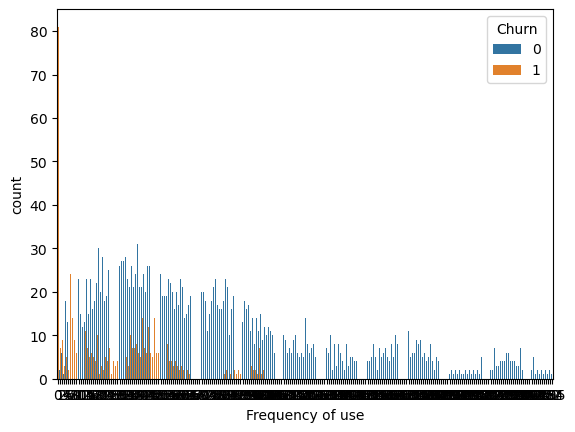

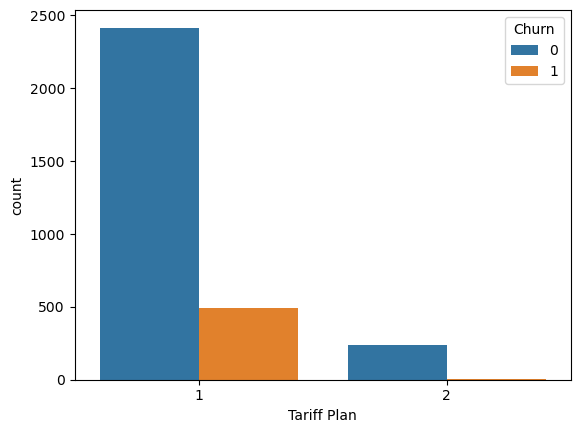

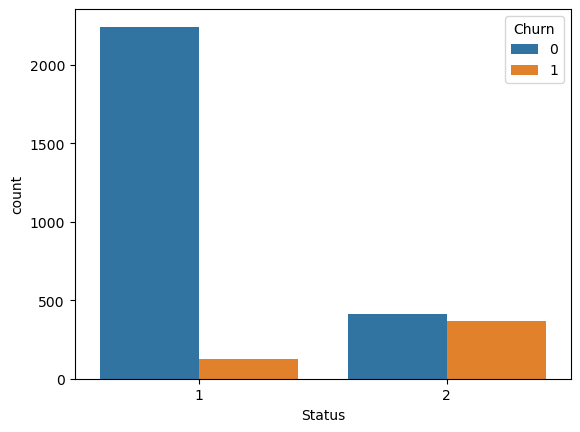

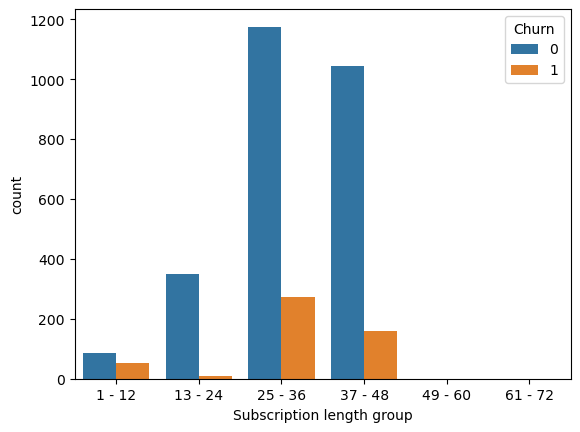

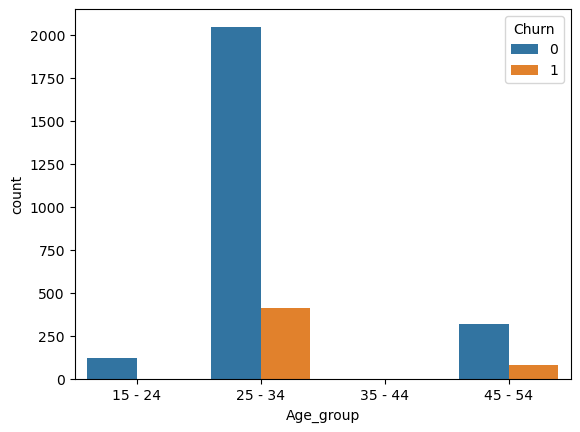

In [42]:
for i,predictor in enumerate(df_data.drop(columns=['Churn', 'Seconds of Use', 'Frequency of SMS', 'Call  Failure', 'Customer Value'])):
    plt.figure(i)
    sns.countplot(data=df_data, x=predictor, hue = 'Churn')

# Insights
1. Inactive customers and Customers with complaints are very likely to churn 
2. Customers with the lowest charge amount are likely to churn as they have the highest ratio comparatively
3. Pay as you go customers have a very high ratio of churning while the customers with contractual payments have a negligible ratio
4. Customers with subscription length of 25-36 and 37-48 are very likely to churn
5. Customers in the age group 25-34 have the highest chances of churning

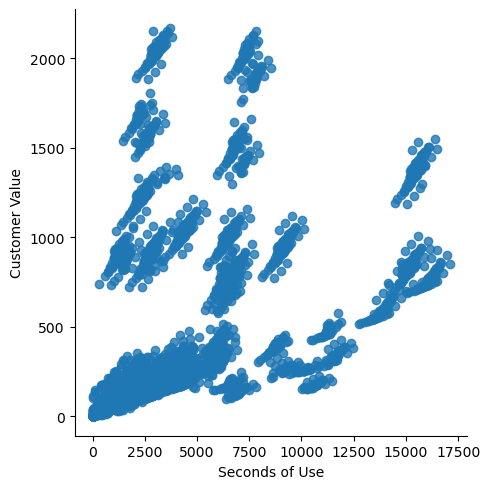

In [44]:
import matplotlib.pyplot as plt

sns.lmplot(data=df_data, y='Customer Value', x='Seconds of Use', fit_reg=False)
plt.show()

The data shows segmentation , it needs clustering


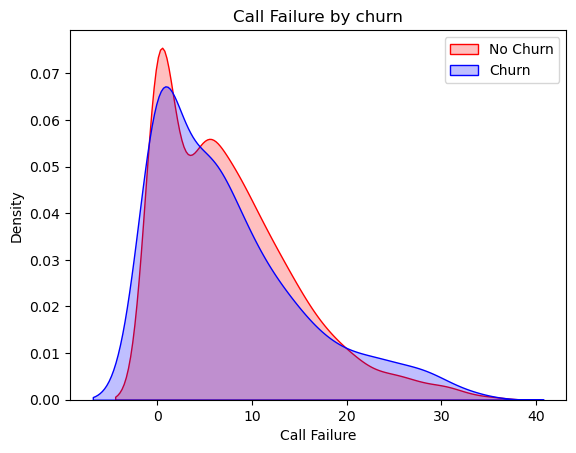

In [46]:
df_data.rename(columns={'Call  Failure': 'Call_Failure'}, inplace=True)
Mth = sns.kdeplot(df_data.Call_Failure[(df_data["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_data.Call_Failure[(df_data["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Call Failure')
Mth.set_title('Call Failure by churn')
plt.show()

The graph does not indicate much as the the regions are completely overlapped 

Churning is high at both higher and lower call failure

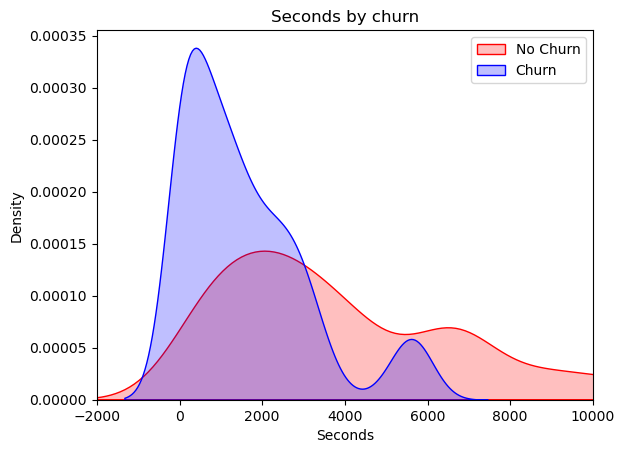

In [48]:
df_data.rename(columns={'Seconds of Use': 'Seconds'}, inplace=True)
Mth = sns.kdeplot(df_data.Seconds[(df_data["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_data.Seconds[(df_data["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')

Mth.set_xlabel('Seconds')
Mth.set_title('Seconds by churn')
Mth.set_xlim(-2000, 10000)

plt.show()

Low usage customers → High chance of churn.

High usage customers → Much lower chance of churn.

This is a strong indicator that engagement (measured in seconds of use) is a good predictor of churn.

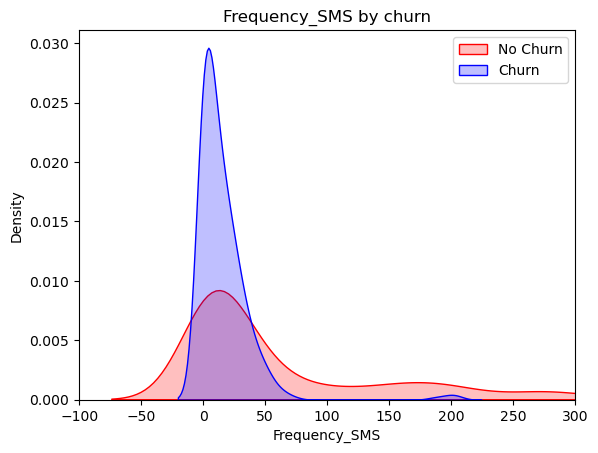

In [50]:
df.rename(columns={'Frequency of SMS': 'Frequency_SMS'}, inplace=True)
Mth = sns.kdeplot(df.Frequency_SMS[(df["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df.Frequency_SMS[(df["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Frequency_SMS')
Mth.set_title('Frequency_SMS by churn')

Mth.set_xlim(-100,300)
plt.show()

Churning is higher when the frequency of SMS is high

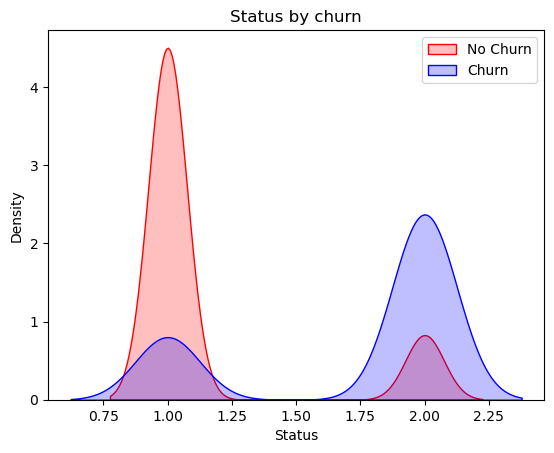

In [52]:
df.rename(columns={'Subscription  Length': 'Tenure'}, inplace=True)
Mth = sns.kdeplot(df.Status[(df["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df.Status[(df["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Status')
Mth.set_title('Status by churn')
plt.show()

Non- active customers have a very high chance of churning.

1 - active customers , 2 - non-active customers

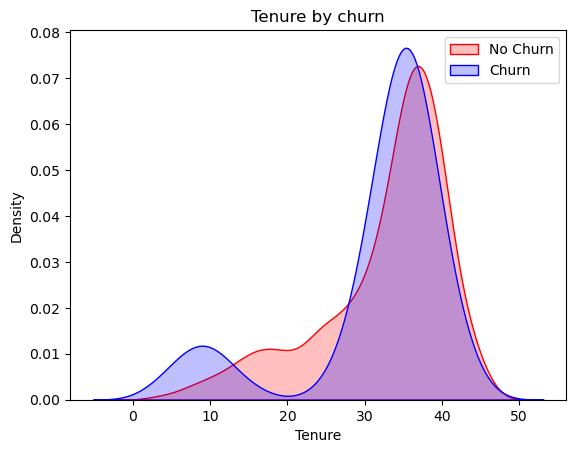

In [54]:
df.rename(columns={'Subscription  Length': 'Tenure'}, inplace=True)
Mth = sns.kdeplot(df.Tenure[(df["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df.Tenure[(df["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Tenure')
Mth.set_title('Tenure by churn')
plt.show()

Tenure is a weak indicator of churning as the graph is almost overlapped.

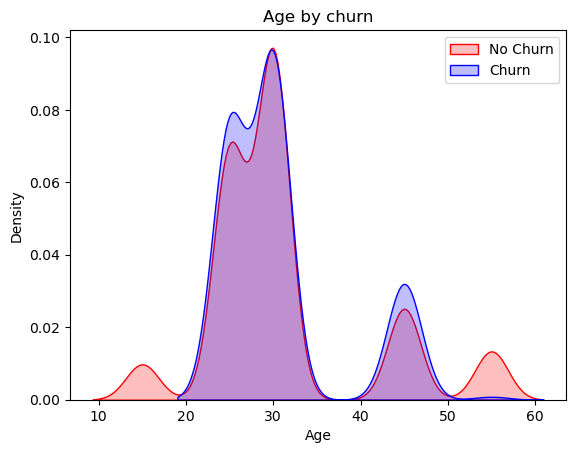

In [56]:
df.rename(columns={'Subscription  Length': 'Tenure'}, inplace=True)
Mth = sns.kdeplot(df.Age[(df["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df.Age[(df["Churn"] == 1) ],
                ax=Mth ,color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Age')
Mth.set_title('Age by churn')
plt.show()

Age is a weak indicator of churning as the graph is overlapped except for the extreme ages that indicate low churning

## One hot encoding

In [59]:
# convert status as 1 for active and 0 for non active
# convert Tariff plan as 1 for pay as you go and 0 for contractual
df_data['Status'] = df_data['Status'].map({1: 1, 2: 0})
df_data['Tariff Plan'] = df_data['Tariff Plan'].map({1: 1, 2: 0})

### Convert all the categorical variables into dummy variables

In [61]:
df_data_dummies = pd.get_dummies(df_data , dtype=int, )
df_data_dummies.head()

,Call_Failure,Complains,Charge Amount,Seconds,Frequency of use,Frequency of SMS,Tariff Plan,Status,Customer Value,Churn,Subscription length group_1 - 12,Subscription length group_13 - 24,Subscription length group_25 - 36,Subscription length group_37 - 48,Subscription length group_49 - 60,Subscription length group_61 - 72,Age_group_15 - 24,Age_group_25 - 34,Age_group_35 - 44,Age_group_45 - 54
0,8,0,0,4370,71,5,1,1,197.640,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,318,5,7,1,0,46.035,0,0,0,0,1,0,0,0,1,0,0
2,10,0,0,2453,60,359,1,1,1536.520,0,0,0,0,1,0,0,0,1,0,0
3,10,0,0,4198,66,1,1,1,240.020,0,0,0,0,1,0,0,1,0,0,0
4,3,0,0,2393,58,2,1,1,145.805,0,0,0,0,1,0,0,1,0,0,0


In [62]:
dummy_cols_to_string=['Complains', 'Tariff Plan' ,'Churn', 'Charge  Amount', 'Status']
df_data_stringed = (df_data[dummy_cols_to_string].astype(str))

In [63]:
df_data_dummies_for_string = pd.get_dummies(df_data_stringed , dtype=int, )
df_data_dummies_for_string.head()

,Complains_0,Complains_1,Tariff Plan_0,Tariff Plan_1,Churn_0,Churn_1,Charge Amount_0,Charge Amount_1,Charge Amount_10,Charge Amount_2,Charge Amount_3,Charge Amount_4,Charge Amount_5,Charge Amount_6,Charge Amount_7,Charge Amount_8,Charge Amount_9,Status_0,Status_1
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


merge

In [65]:
df_data_final = pd.concat([df_data_dummies, df_data_dummies_for_string], axis=1)
df_data_final.head()

,Call_Failure,Complains,Charge Amount,Seconds,Frequency of use,Frequency of SMS,Tariff Plan,Status,Customer Value,Churn,...,Charge Amount_2,Charge Amount_3,Charge Amount_4,Charge Amount_5,Charge Amount_6,Charge Amount_7,Charge Amount_8,Charge Amount_9,Status_0,Status_1
0,8,0,0,4370,71,5,1,1,197.640,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,318,5,7,1,0,46.035,0,...,0,0,0,0,0,0,0,0,1,0
2,10,0,0,2453,60,359,1,1,1536.520,0,...,0,0,0,0,0,0,0,0,0,1
3,10,0,0,4198,66,1,1,1,240.020,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,2393,58,2,1,1,145.805,0,...,0,0,0,0,0,0,0,0,0,1


Deleting original columns that have been dummied

In [67]:
df_data_final.drop(columns=['Tariff Plan','Status','Complains','Churn','Charge  Amount'],inplace= True, axis=1)

In [68]:
df_data_final.to_csv('cust_churn_dummies.csv')

In [69]:
df_data_final.columns

Index(['Call_Failure', 'Seconds', 'Frequency of use', 'Frequency of SMS',
       'Customer Value', 'Subscription length group_1 - 12',
       'Subscription length group_13 - 24',
       'Subscription length group_25 - 36',
       'Subscription length group_37 - 48',
       'Subscription length group_49 - 60',
       'Subscription length group_61 - 72', 'Age_group_15 - 24',
       'Age_group_25 - 34', 'Age_group_35 - 44', 'Age_group_45 - 54',
       'Complains_0', 'Complains_1', 'Tariff Plan_0', 'Tariff Plan_1',
       'Churn_0', 'Churn_1', 'Charge  Amount_0', 'Charge  Amount_1',
       'Charge  Amount_10', 'Charge  Amount_2', 'Charge  Amount_3',
       'Charge  Amount_4', 'Charge  Amount_5', 'Charge  Amount_6',
       'Charge  Amount_7', 'Charge  Amount_8', 'Charge  Amount_9', 'Status_0',
       'Status_1'],
      dtype='object')

These are the final columns that will further be used in model building